In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [22]:
data_dir = '../outputs/reintubation_df.csv'

reintubation_df = pd.read_csv(data_dir, index_col=0)
reintubation_df.shape

(9008, 18)

In [23]:
reintubation_df[reintubation_df.reintubationtime == 0.0][['hadm_id', 'intubationtime', 'extubationtime', 'ext_itemid', 'extubationcause','reintubation_eventtime', 'reintubationtime']]

,hadm_id,intubationtime,extubationtime,ext_itemid,extubationcause,reintubation_eventtime,reintubationtime
1656,24994500,2142-11-23 06:55:00,2142-11-24 15:23:00,227194.0,Planned Extubation,2142-11-24 15:23:00,0.0
2129,21071536,2124-07-22 12:15:00,2124-08-02 12:15:00,227194.0,Planned Extubation,2124-08-02 12:15:00,0.0
2582,27831438,2136-01-25 08:50:00,2136-01-27 14:24:00,227194.0,Planned Extubation,2136-01-27 14:24:00,0.0
4767,29715756,2184-10-26 21:57:00,2184-10-29 10:25:00,225468.0,Unplanned Extubation (patient-initiated),2184-10-29 10:25:00,0.0
8346,26432998,2188-01-09 10:45:00,2188-01-10 07:45:00,225468.0,Unplanned Extubation (patient-initiated),2188-01-10 07:45:00,0.0


In [24]:
reintubation_df[reintubation_df.extubationcause == 'Unplanned Extubation (patient-initiated)'].reintubationtime.describe()

count      171.000000
mean      1256.912281
std       4768.224268
min          0.000000
25%         15.000000
50%         40.000000
75%        509.000000
max      53812.000000
Name: reintubationtime, dtype: float64

In [25]:
desc_reint = (reintubation_df.reintubationtime/60).describe()
desc_reint

count    1806.000000
mean       79.922204
std       157.714390
min         0.000000
25%         4.670833
50%        28.950000
75%        91.345833
max      2455.333333
Name: reintubationtime, dtype: float64

(null 값 제외하고) 재삽관 시간 확인
-  재삽관 케이스 1806/9396 ()

In [26]:
reintubation_df.shape

(9008, 18)

In [27]:
count_reint = reintubation_df.reintubationtime.notna().sum()
full_data = reintubation_df.shape[0]
reint_array = reintubation_df[reintubation_df.reintubationtime.notna()]['reintubationtime']
reint_mean = reint_array.mean()
print(f'(null 값 제외) 재삽관 데이터 수: {count_reint} / {full_data} ({round(count_reint/full_data * 100, 2)} %)')
print(f'재삽관 시간 중간값(시간): {desc_reint[5]}')
print(f'재삽관 시간 평균(시간): {desc_reint[1]}')
print(f'재삽관 시간 표준편차(시간): {desc_reint[2]}')
# print(f'재삽관 시간 범위(시간): {desc_reint[3]} ~ {desc_reint[7]}')


(null 값 제외) 재삽관 데이터 수: 1806 / 9008 (20.05 %)
재삽관 시간 중간값(시간): 28.95
재삽관 시간 평균(시간): 79.92220376522701
재삽관 시간 표준편차(시간): 157.71438965131807


/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_3208/244966271.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'재삽관 시간 중간값(시간): {desc_reint[5]}')
/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_3208/244966271.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'재삽관 시간 평균(시간): {desc_reint[1]}')
/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_3208/244966271.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

In [28]:
outlier_removed_df = reintubation_df[(reintubation_df.reintubationtime.notna()) & reintubation_df.reintubationtime/60 < 2000]['reintubationtime']

In [29]:
(outlier_removed_df / 60).describe()

count    1806.000000
mean       79.922204
std       157.714390
min         0.000000
25%         4.670833
50%        28.950000
75%        91.345833
max      2455.333333
Name: reintubationtime, dtype: float64

In [30]:
reint_array

3          30.0
13      11319.0
14       3827.0
18       5400.0
21         67.0
         ...   
8986     2022.0
8990     7113.0
9000      619.0
9002     6471.0
9003     4430.0
Name: reintubationtime, Length: 1806, dtype: float64

In [31]:
test_subs = [24994500, 21071536, 27831438]

reintubation_df[reintubation_df.hadm_id.isin(test_subs)]

,subject_id,hadm_id,int_stayid,admittime,intubationtime,int_itemid,int_weight,ext_stayid,extubationtime,ext_itemid,ext_weight,extubationcause,dischtime,deathtime,marker,mvtime,reintubation_eventtime,reintubationtime
1656,11871434,24994500,31855550.0,2142-11-19 15:16:00,2142-11-23 06:55:00,224385.0,80.0,31855550.0,2142-11-24 15:23:00,227194.0,80.0,Planned Extubation,2142-12-05 17:00:00,NaN,NaN,1948.0,2142-11-24 15:23:00,0.0
1657,11871434,24994500,31855550.0,2142-11-19 15:16:00,2142-11-24 15:23:00,224385.0,80.0,31855550.0,2142-11-29 15:50:00,227194.0,80.0,Planned Extubation,2142-12-05 17:00:00,NaN,NaN,7227.0,NaN,NaN
2129,12393609,21071536,37742636.0,2124-07-20 22:04:00,2124-07-22 12:15:00,224385.0,120.6,37742636.0,2124-08-02 12:15:00,227194.0,120.6,Planned Extubation,2124-08-25 13:47:00,NaN,NaN,15840.0,2124-08-02 12:15:00,0.0
2130,12393609,21071536,37742636.0,2124-07-20 22:04:00,2124-08-02 12:15:00,224385.0,120.6,37742636.0,2124-08-04 15:00:00,227194.0,120.6,Planned Extubation,2124-08-25 13:47:00,NaN,NaN,3045.0,2124-08-04 18:16:00,196.0
2131,12393609,21071536,37742636.0,2124-07-20 22:04:00,2124-08-04 18:16:00,224385.0,120.6,NaN,NaN,NaN,NaN,NaN,2124-08-25 13:47:00,NaN,NaN,NaN,NaN,NaN
2582,12867875,27831438,38344915.0,2136-01-21 10:52:00,2136-01-25 08:50:00,224385.0,61.8,38344915.0,2136-01-27 14:24:00,227194.0,61.8,Planned Extubation,2136-02-25 17:15:00,NaN,NaN,3214.0,2136-01-27 14:24:00,0.0
2583,12867875,27831438,38344915.0,2136-01-21 10:52:00,2136-01-27 14:24:00,224385.0,61.8,38344915.0,2136-01-30 15:40:00,225468.0,61.8,Unplanned Extubation (patient-initiated),2136-02-25 17:15:00,NaN,NaN,4396.0,NaN,NaN


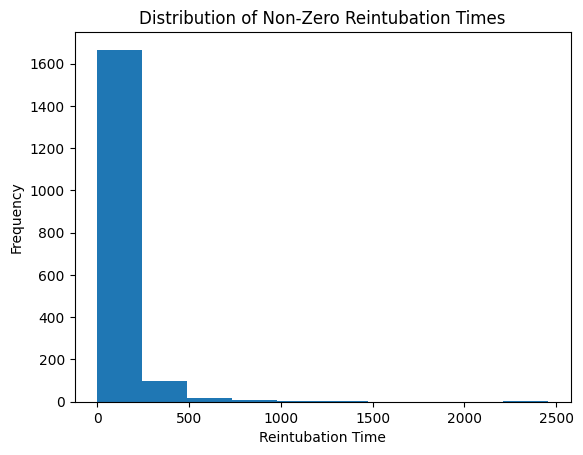

In [32]:
non_zero_reinttime = reintubation_df[reintubation_df.reintubationtime > 0].reintubationtime/60

plt.hist(non_zero_reinttime)  # Create a histogram by default
plt.xlabel("Reintubation Time")
plt.ylabel("Frequency")
plt.title("Distribution of Non-Zero Reintubation Times")
plt.show()


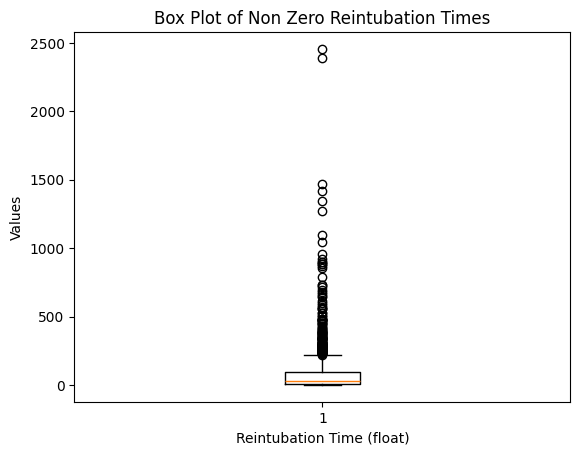

In [33]:
# Create the box plot
plt.boxplot(non_zero_reinttime)

# Add labels and title
plt.xlabel("Reintubation Time (float)")
plt.ylabel("Values")
plt.title("Box Plot of Non Zero Reintubation Times")

# Show the plot
plt.show()

In [34]:
reintubation_df[reintubation_df.reintubationtime / 60 > 2000]

,subject_id,hadm_id,int_stayid,admittime,intubationtime,int_itemid,int_weight,ext_stayid,extubationtime,ext_itemid,ext_weight,extubationcause,dischtime,deathtime,marker,mvtime,reintubation_eventtime,reintubationtime
2283,12588462,29443707,NaN,2131-06-30 07:15:00,NaN,NaN,NaN,30246887.0,2131-07-01 09:28:00,227194.0,65.4,Planned Extubation,2131-10-31 10:19:00,2131-10-31 10:19:00,NaN,NaN,2131-10-11 16:48:00,147320.0
4411,14923562,23365149,NaN,2115-06-06 19:23:00,NaN,NaN,NaN,35693035.0,2115-08-03 22:00:00,227194.0,93.0,Planned Extubation,2116-02-10 06:09:00,2116-02-10 06:09:00,NaN,NaN,2115-11-11 14:18:00,143538.0


In [35]:
extreme_hadms = [29443707, 23365149]

reintubation_df[reintubation_df.hadm_id.isin(extreme_hadms)]

,subject_id,hadm_id,int_stayid,admittime,intubationtime,int_itemid,int_weight,ext_stayid,extubationtime,ext_itemid,ext_weight,extubationcause,dischtime,deathtime,marker,mvtime,reintubation_eventtime,reintubationtime
2283,12588462,29443707,NaN,2131-06-30 07:15:00,NaN,NaN,NaN,30246887.0,2131-07-01 09:28:00,227194.0,65.4,Planned Extubation,2131-10-31 10:19:00,2131-10-31 10:19:00,NaN,NaN,2131-10-11 16:48:00,147320.0
2284,12588462,29443707,32189053.0,2131-06-30 07:15:00,2131-10-11 16:48:00,224385.0,62.0,32189053.0,2131-10-13 12:05:00,227194.0,62.0,Planned Extubation,2131-10-31 10:19:00,2131-10-31 10:19:00,NaN,2597.0,NaN,NaN
4409,14923562,23365149,NaN,2115-06-06 19:23:00,NaN,NaN,NaN,37379658.0,2115-06-16 10:15:00,227194.0,94.0,Planned Extubation,2116-02-10 06:09:00,2116-02-10 06:09:00,NaN,NaN,2115-06-20 12:00:00,5865.0
4410,14923562,23365149,37379658.0,2115-06-06 19:23:00,2115-06-20 12:00:00,224385.0,94.0,37379658.0,2115-06-23 16:55:00,227194.0,94.0,Planned Extubation,2116-02-10 06:09:00,2116-02-10 06:09:00,NaN,4615.0,NaN,NaN
4411,14923562,23365149,NaN,2115-06-06 19:23:00,NaN,NaN,NaN,35693035.0,2115-08-03 22:00:00,227194.0,93.0,Planned Extubation,2116-02-10 06:09:00,2116-02-10 06:09:00,NaN,NaN,2115-11-11 14:18:00,143538.0
4412,14923562,23365149,38606468.0,2115-06-06 19:23:00,2115-11-11 14:18:00,224385.0,77.0,NaN,NaN,NaN,NaN,NaN,2116-02-10 06:09:00,2116-02-10 06:09:00,NaN,NaN,NaN,NaN


In [36]:
len(reintubation_df.hadm_id.unique())

6699

In [37]:
reintubation_df[reintubation_df.subject_id == 10143030]

,subject_id,hadm_id,int_stayid,admittime,intubationtime,int_itemid,int_weight,ext_stayid,extubationtime,ext_itemid,ext_weight,extubationcause,dischtime,deathtime,marker,mvtime,reintubation_eventtime,reintubationtime
103,10143030,27543597,38333165.0,2180-04-19 09:39:00,2180-05-17 01:55:00,224385.0,94.0,NaN,NaN,NaN,NaN,NaN,2180-07-23 05:44:00,2180-07-23 05:44:00,NaN,NaN,2180-06-01 13:10:00,NaN
104,10143030,27543597,38333165.0,2180-04-19 09:39:00,2180-06-01 13:10:00,224385.0,94.0,NaN,NaN,NaN,NaN,NaN,2180-07-23 05:44:00,2180-07-23 05:44:00,NaN,NaN,2180-06-20 18:39:00,NaN
105,10143030,27543597,32874601.0,2180-04-19 09:39:00,2180-06-20 18:39:00,224385.0,84.1,NaN,NaN,NaN,NaN,NaN,2180-07-23 05:44:00,2180-07-23 05:44:00,NaN,NaN,NaN,NaN
